# Chapter-8 : Linear Regression

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

C:\Users\raj15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Loading data

In [3]:
dataset = pd.read_csv('diabetes.txt',delimiter='\t')
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


## Selecting X:Features and y: Output

In [5]:
X=dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

## Importing methods form Scikit-Learn

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=110)

## Training Model

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction of Y_test

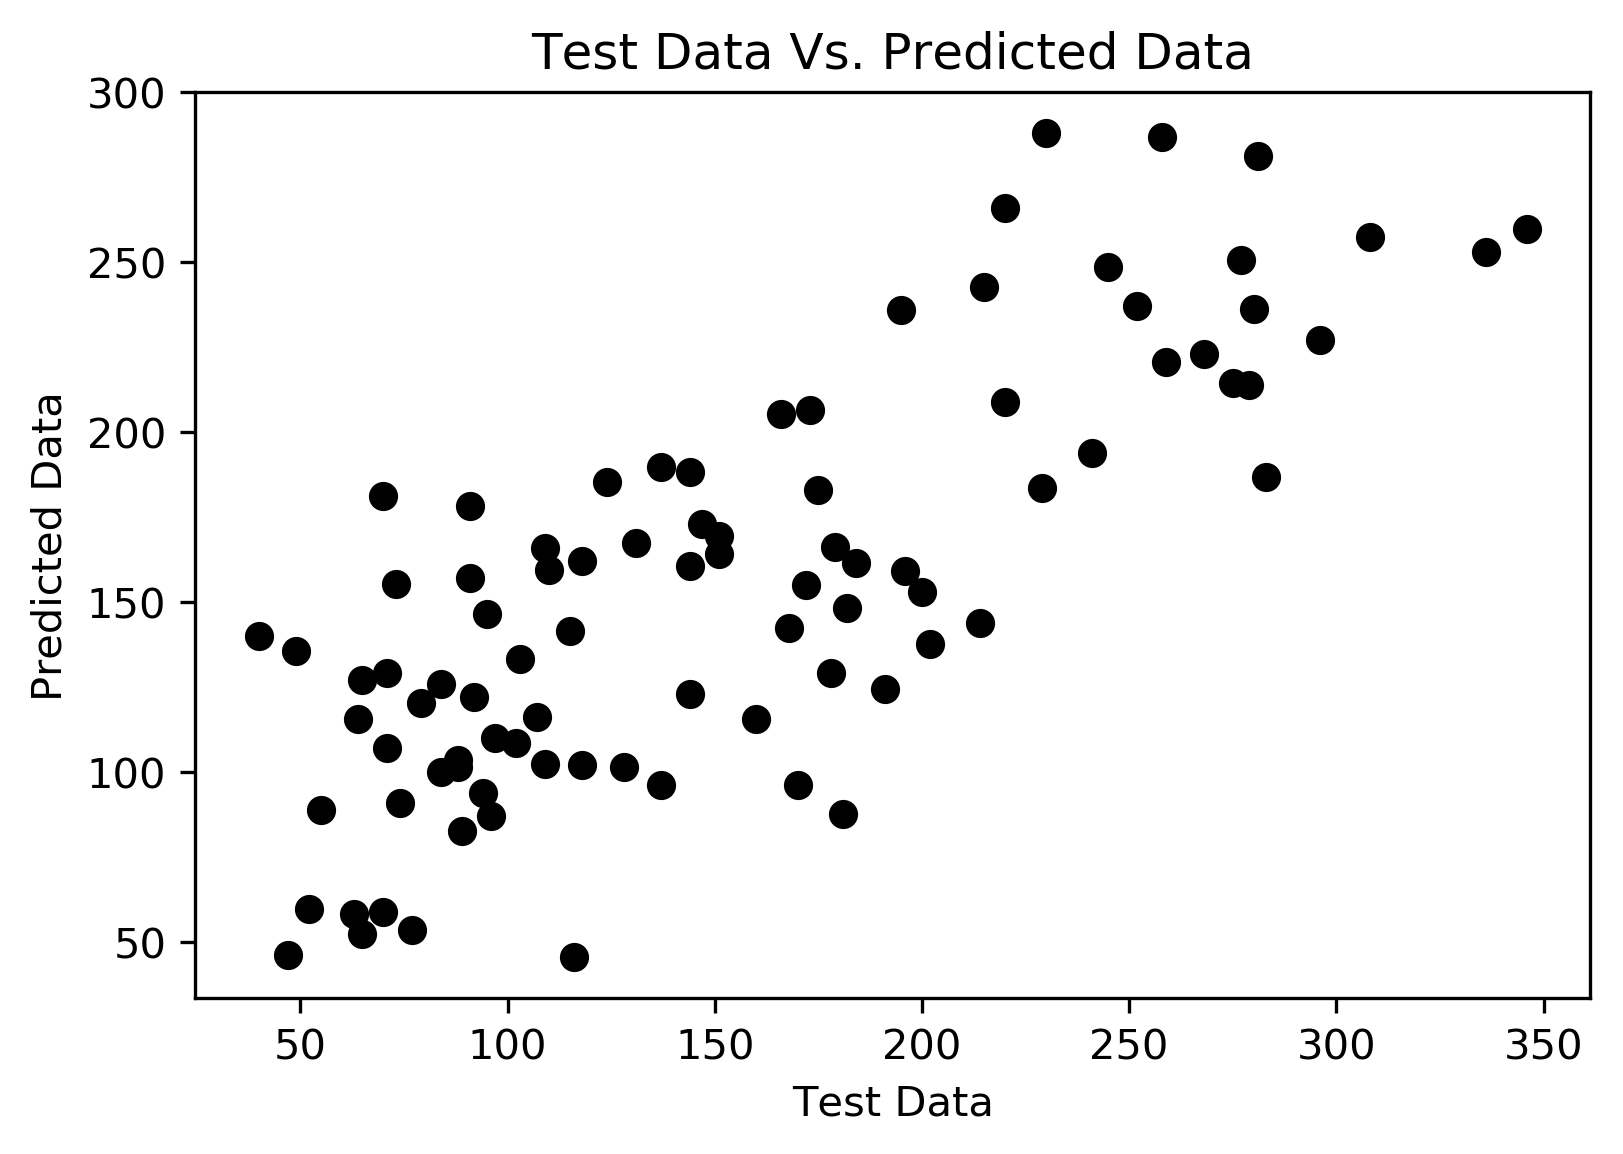

In [9]:
predictions=regressor.predict(X_test)
plt.scatter(y_test, predictions,color='k')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.show()

In [10]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-307.57104546505445
[ 1.40608997e-01 -2.56128390e+01  5.08771783e+00  1.19293496e+00
 -1.08819176e+00  8.03227722e-01  4.24108443e-02  4.53744471e+00
  6.51304992e+01  3.71060693e-01]


In [11]:
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
AGE,0.140609
SEX,-25.612839
BMI,5.087718
BP,1.192935
S1,-1.088192
S2,0.803228
S3,0.042411
S4,4.537445
S5,65.130499
S6,0.371061


## Evaluation Matrices

In [12]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 39.22466065716574
Mean Squared Error: 2228.0908310594655
Root Mean Squared Error: 47.202657033894454


In [13]:
print('R Squared:', metrics.r2_score(y_test, predictions)) 

R Squared: 0.6192854503707951


## Loading Galton Height Dataset

In [5]:
dataset = pd.read_csv('Galton.txt',delimiter='\t')
dataset.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Father,898.0,69.232851,2.470256,62.0,68.0,69.0,71.0,78.5
Mother,898.0,64.084410,2.307025,58.0,63.0,64.0,65.5,70.5
Height,898.0,66.760690,3.582918,56.0,64.0,66.5,69.7,79.0
Kids,898.0,6.135857,2.685156,1.0,4.0,6.0,8.0,15.0


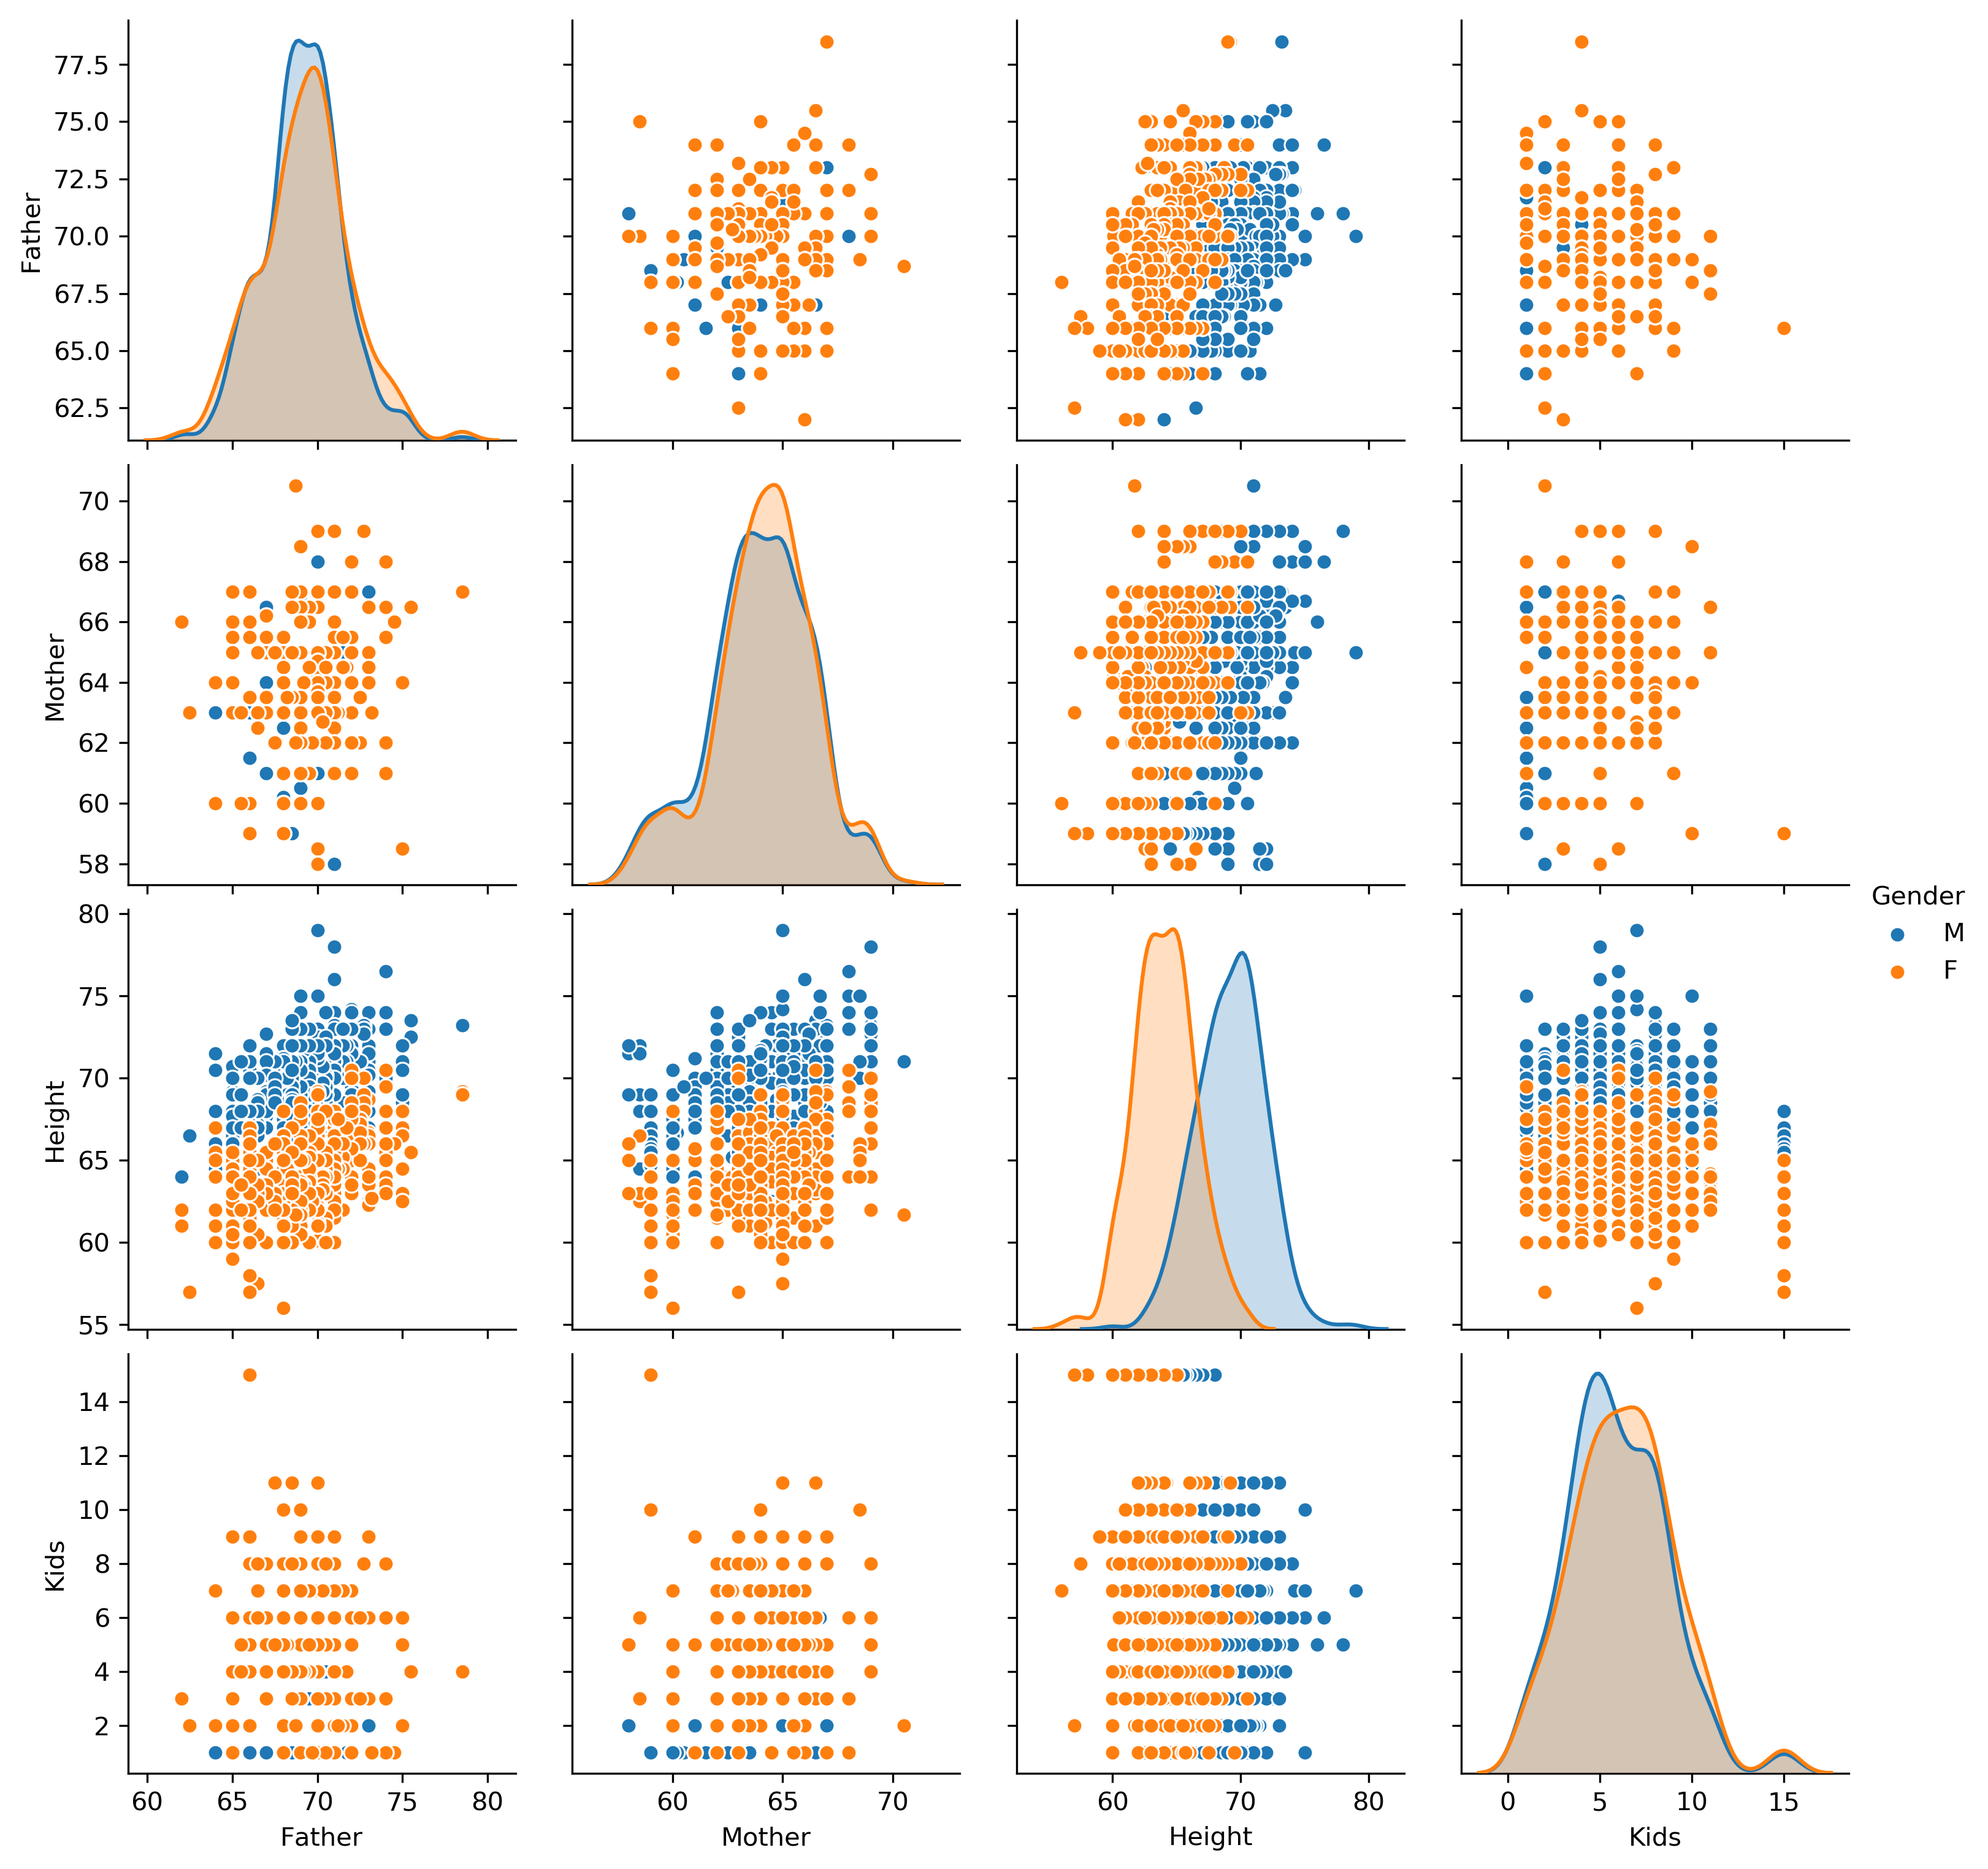

In [16]:
sns.pairplot(dataset,hue='Gender')

## Spliting the datasets for boys and girls

In [17]:
boys = dataset[dataset['Gender']=='M']
boys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 894
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  465 non-null    object 
 1   Father  465 non-null    float64
 2   Mother  465 non-null    float64
 3   Gender  465 non-null    object 
 4   Height  465 non-null    float64
 5   Kids    465 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 25.4+ KB


In [18]:
girls = dataset[dataset['Gender']=='F']
girls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 1 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  433 non-null    object 
 1   Father  433 non-null    float64
 2   Mother  433 non-null    float64
 3   Gender  433 non-null    object 
 4   Height  433 non-null    float64
 5   Kids    433 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 23.7+ KB


## Selecting X:Features and y: Output

In [19]:
X = boys[['Father','Mother']]
y = boys[['Height']]

## Importing methods form Scikit-Learn

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

## Training Model

In [22]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction of Ytest

In [23]:
predictions=regressor.predict(X_test)

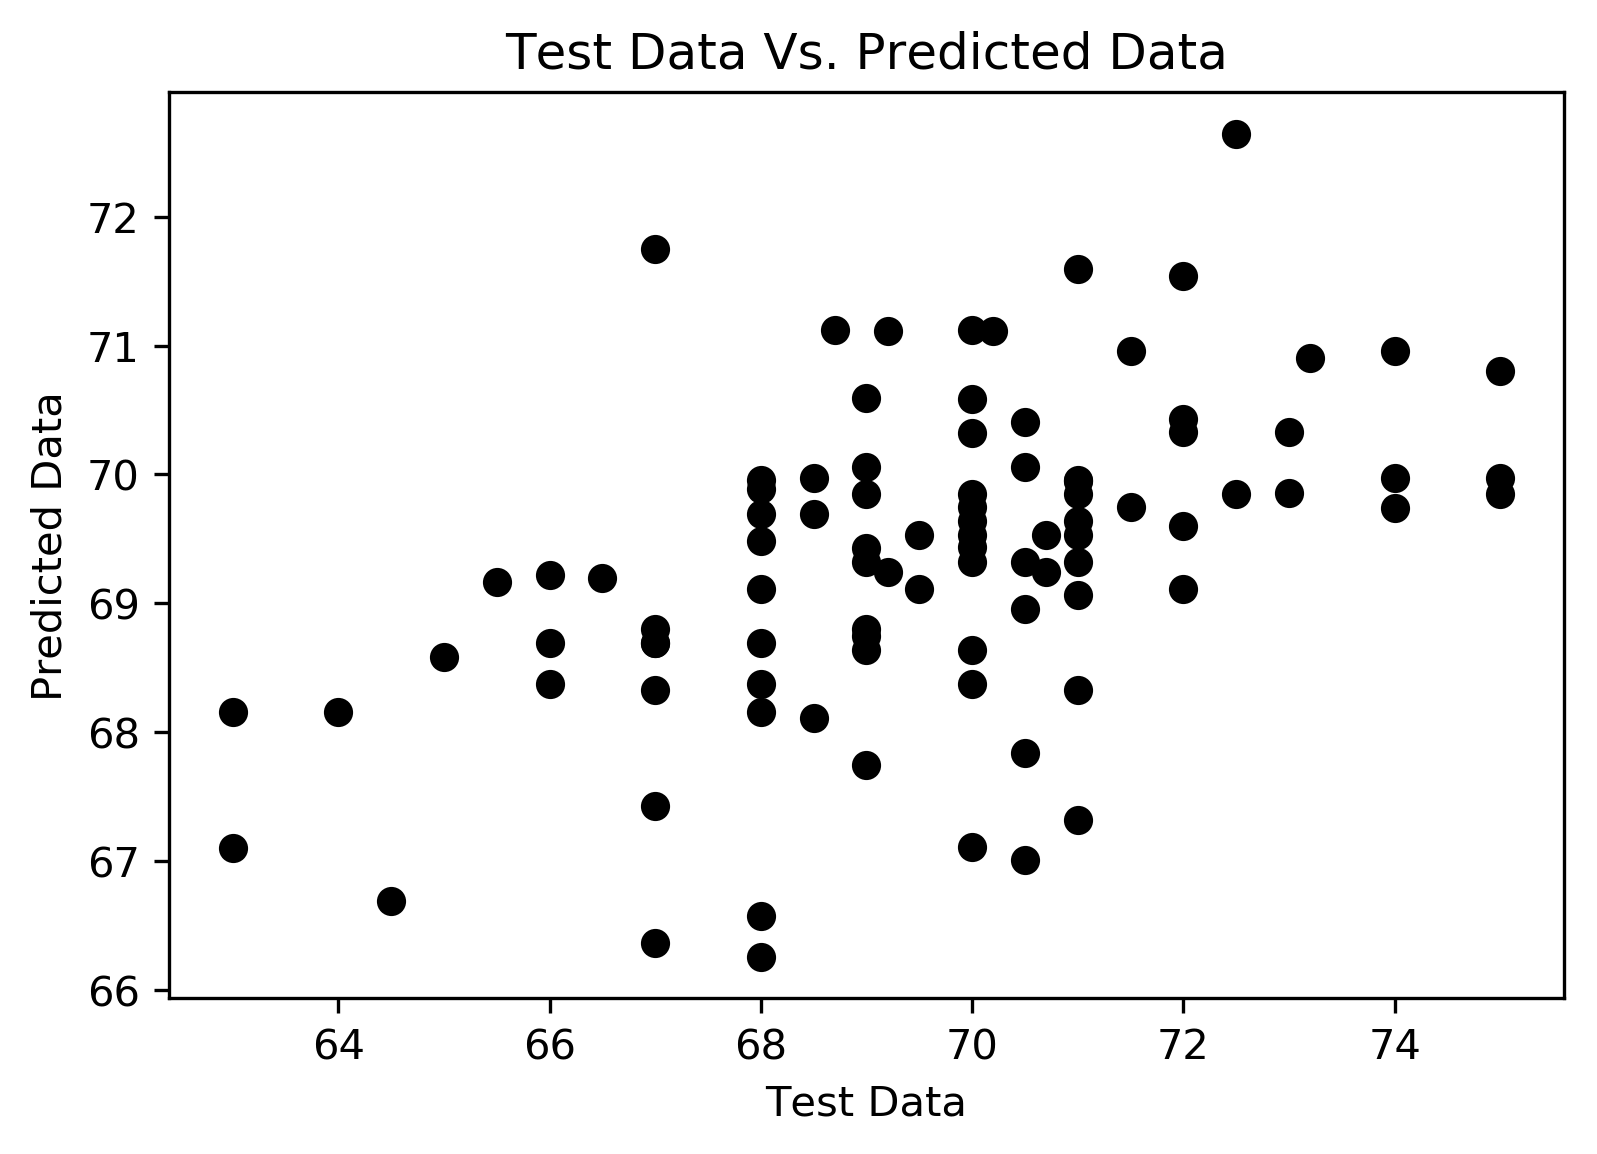

In [24]:
plt.scatter(y_test, predictions,color='k')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.show()

In [25]:
## Intercept and cefficient

In [26]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[19.69844015]
[[0.42126262 0.31789907]]


In [27]:
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Father,0.421263
Mother,0.317899


## Evaluation Matrices

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R Squared:', metrics.r2_score(y_test, predictions)) 

Mean Absolute Error: 1.7284131207951459
Mean Squared Error: 4.724556054413049
Root Mean Squared Error: 2.1736043923430612
R Squared: 0.23643813173550632


## Coustom Prediction

In [29]:
father_height=70
mother_height=65
son_height=regressor.predict(np.array([[father_height,mother_height]]))
print(son_height)

[[69.85026337]]


In [30]:
# For Girls

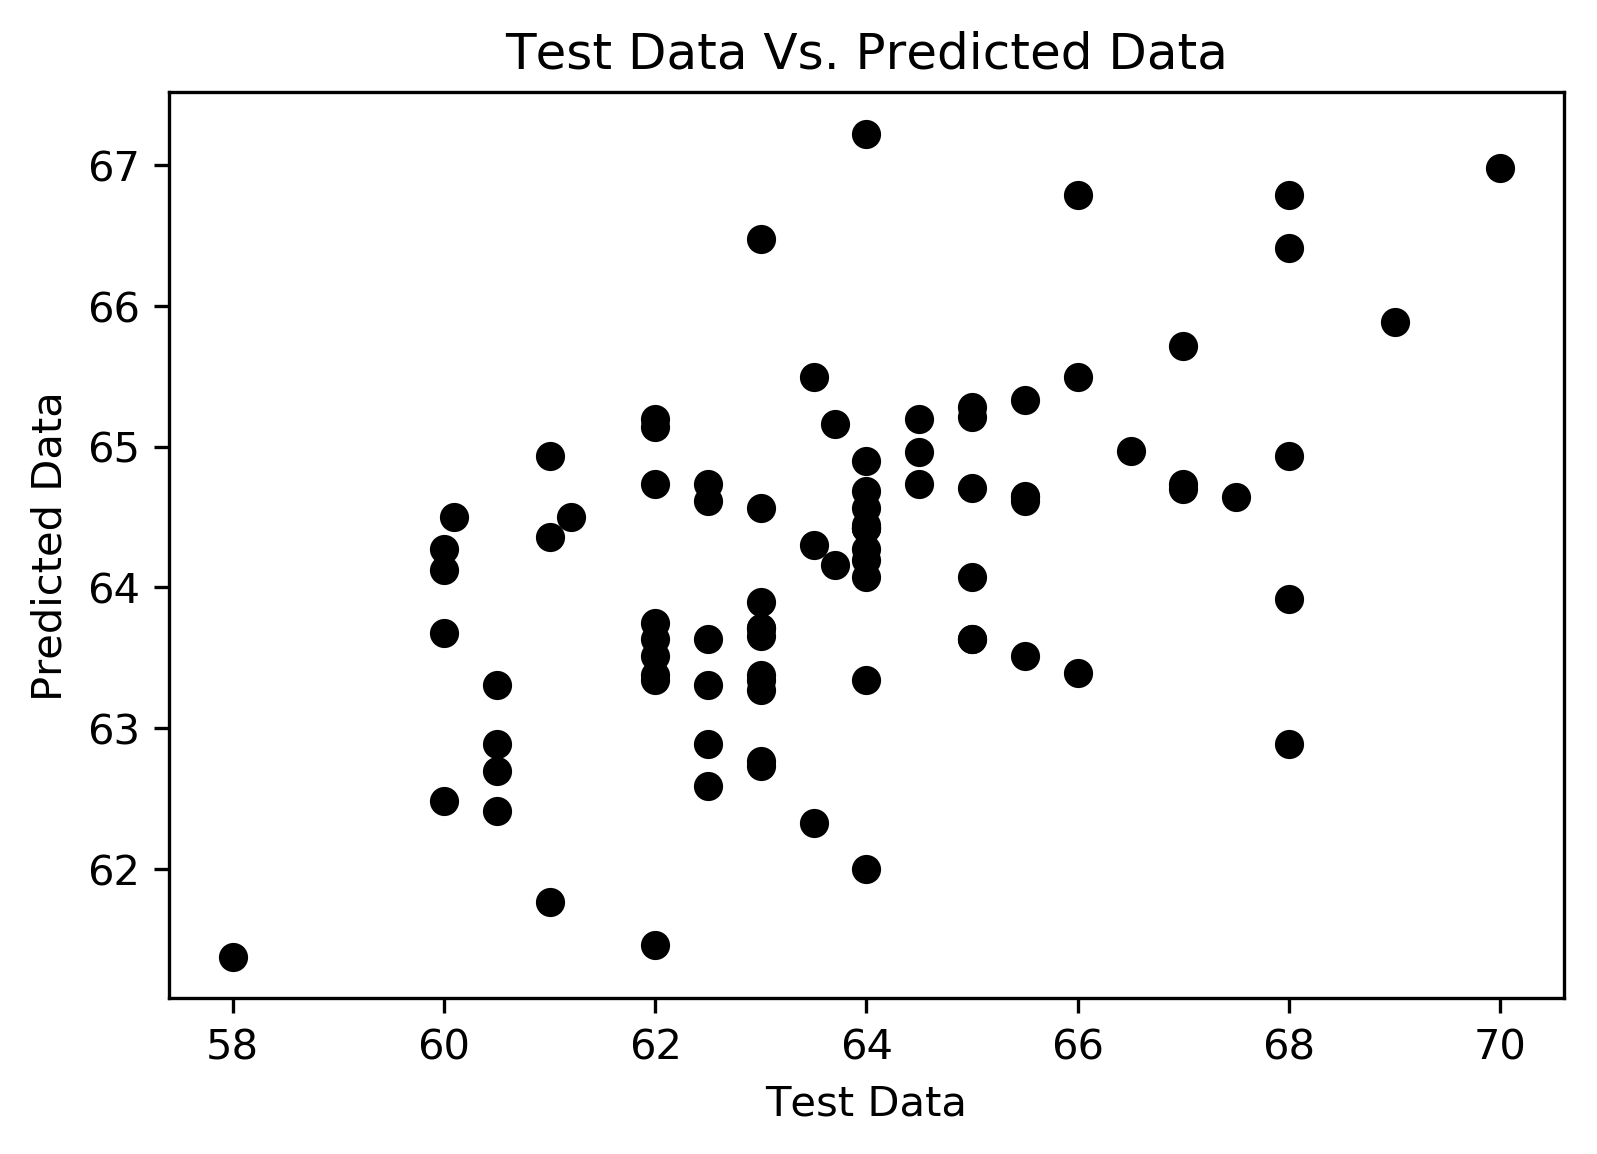

In [31]:
X = girls[['Father','Mother']]
y = girls[['Height']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
predictions=regressor.predict(X_test)
plt.scatter(y_test, predictions,color='k')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.show()

In [32]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[17.53100477]
[[0.4070717  0.28776276]]


In [33]:
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Father,0.407072
Mother,0.287763


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R Squared:', metrics.r2_score(y_test, predictions)) 

Mean Absolute Error: 1.5923427908120276
Mean Squared Error: 4.102869748180959
Root Mean Squared Error: 2.0255541829783175
R Squared: 0.24038809233007208


## Exercise:

1.	What do you mean by machine learning?
2.	How are classification based models evaluated using test sets?
3.	What matrix tells the error in regression models.
4.	Parameter optimization of the model is one of the important factors for improving the performance of a model. How can the parameters be optimized?
5.	What type of data are not appropriate for machine learning tasks.
6.	Mention the general steps for a typical machine learning implementation.
7.	What is the difference between sk-learns fit function for a processer and estimator?
8.	Use the linear regression model to predict ‘BP’ form ‘'diabetes.txt' dataset.
9.	Find the features which have height contribution for prediction of “BP’. 
